Task 4: Stock Market Prediction using 

In [1]:
#Importing the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 7)
import warnings
warnings.filterwarnings('ignore')                             
from datetime import datetime


In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving india-news-headlines.csv to india-news-headlines.csv


KeyboardInterrupt: ignored

In [ ]:
path ='C:/Users/admin/Documents/GRIP Internship/Task 4 (Stock market prediction using numerical and texual analysis)/india-news-headlines.csv'
# dateparse = lambda date: pd.datetime.strptime(date, '%Y-%m-%d')
lastconnection = lambda date: pd.datetime.strptime(date, '%Y%m%d').strftime('%Y-%m-%d')

news = pd.read_csv('india-news-headlines.csv', parse_dates=['publish_date'], date_parser=lastconnection)


FileNotFoundError: ignored

In [ ]:
news.shape

(3297172, 3)

In [ ]:
news.head()

,publish_date,headline_category,headline_text
0,2001-01-01,sports.wwe,win over cena satisfying but defeating underta...
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
3,2001-01-02,unknown,America's unwanted heading for India?
4,2001-01-02,unknown,For bigwigs; it is destination Goa


In [ ]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   publish_date       datetime64[ns]
 1   headline_category  object        
 2   headline_text      object        
dtypes: datetime64[ns](1), object(2)
memory usage: 75.5+ MB


In [ ]:
print('Shape of the dataset', news.shape)

Shape of the dataset (3297172, 3)


In [ ]:
news_df = news[news['publish_date'] > '2015-01-01']
news_df.shape

(1292109, 3)

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving ^BSESN.csv to ^BSESN.csv
User uploaded file "^BSESN.csv" with length 378365 bytes


In [5]:
stock = pd.read_csv('^BSESN.csv', parse_dates=['Date'])
stock.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-06-01,3637.030029,3651.320068,3555.739990,3557.639893,3557.639893,0.0
1,2001-06-04,3565.879883,3590.560059,3490.830078,3498.379883,3498.379883,0.0
2,2001-06-05,3495.989990,3510.679932,3434.879883,3460.040039,3460.040039,0.0
3,2001-06-06,3473.320068,3507.239990,3448.439941,3457.310059,3457.310059,0.0
4,2001-06-07,3455.860107,3459.510010,3395.520020,3457.239990,3457.239990,0.0
5,2001-06-08,3466.659912,3502.780029,3452.939941,3495.840088,3495.840088,0.0
6,2001-06-11,3507.340088,3525.040039,3482.800049,3509.320068,3509.320068,0.0
7,2001-06-12,3504.239990,3517.360107,3484.080078,3498.389893,3498.389893,0.0
8,2001-06-13,3499.320068,3519.129883,3492.949951,3501.610107,3501.610107,0.0
9,2001-06-14,3491.360107,3501.500000,3446.959961,3453.770020,3453.770020,0.0


In [8]:
# stock['Date'] = stock['Date'].astype('datetime64[ns]')
stock_df = stock[stock['Date'] > '2015-01-01']
stock_df.set_index('Date', inplace=True)
stock_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400.0
2015-01-05,27978.429688,28064.490234,27786.849609,27842.320313,27842.320313,9200.0
2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100.0
2015-01-07,26983.429688,27051.599609,26776.119141,26908.820313,26908.820313,12200.0
2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200.0


In [9]:
print(stock.shape)
print(stock_df.shape)

stock_df.tail(10)

(4760, 7)
(1350, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-16,33853.718750,34022.011719,32953.300781,33605.218750,33605.218750,27400.0
2020-06-17,33438.308594,33933.660156,33332.960938,33507.921875,33507.921875,20200.0
2020-06-18,33371.519531,34276.011719,33371.519531,34208.050781,34208.050781,21200.0
2020-06-19,34335.378906,34848.371094,34136.390625,34731.730469,34731.730469,27900.0
2020-06-22,34892.031250,35213.519531,34794.398438,34911.320313,34911.320313,25100.0
2020-06-23,35015.730469,35482.160156,34843.691406,35430.429688,35430.429688,25200.0
2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0
2020-06-25,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0
2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0


In [10]:
# stock_df.style.format({"Date": lambda t: t.strftime("%d/%m/%Y")})
# stock_df.head()

In [11]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4760 non-null   datetime64[ns]
 1   Open       4691 non-null   float64       
 2   High       4691 non-null   float64       
 3   Low        4691 non-null   float64       
 4   Close      4691 non-null   float64       
 5   Adj Close  4691 non-null   float64       
 6   Volume     4691 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 260.4 KB


In [12]:
stock_df.dropna(inplace=True)

# check the null values 
stock_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# df = pd.merge(news, stock,how='inner')

## Text  Preprocessing 

In [ ]:
news_df = news.iloc[:10000,:]
news_df.shape

(10000, 3)

In [ ]:
len(news_df.publish_date)

10000

In [ ]:
news_df.headline_category.unique()

array(['sports.wwe', 'unknown', 'entertainment.hindi.bollywood', 'india',
       'city.bengaluru', 'city.patna', 'business.india-business',
       'entertainment.english.hollywood', 'city.delhi', 'edit-page',
       'sports.cricket.india-domestic.ranji-trophy', 'sports.football',
       'only-in-america', 'city.ahmedabad', 'jugular-vein', 'swaminomics',
       'city.thiruvananthapuram', 'city.pune', 'home.science',
       'city.mumbai', 'city.chandigarh', 'city.lucknow', 'city.kolkata',
       'city.hyderabad', 'cricket', 'business.international-business',
       'city', 'removed', 'home.sunday-times.deep-focus', 'bombay-times'],
      dtype=object)

In [ ]:
news_df.headline_text[:10]

0    win over cena satisfying but defeating underta...
1    Status quo will not be disturbed at Ayodhya; s...
2                  Fissures in Hurriyat over Pak visit
3                America's unwanted heading for India?
4                   For bigwigs; it is destination Goa
5                 Extra buses to clear tourist traffic
6          Dilute the power of transfers; says Riberio
7                    Focus shifts to teaching of Hindi
8                 IT will become compulsory in schools
9        Move to stop freedom fighters' pension flayed
Name: headline_text, dtype: object

In [ ]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
corpus = []
for i in range(0,10000):
    headline = re.sub('[^a-zA-Z]', ' ',news_df['headline_text'][i])
    headline = headline.lower()
    headline = headline.split()
#     ps = PorterStemmer()
#     headline = [ps.stem(word) for word in headline if not word in set(stopwords.words('english'))]
    headline = ' '.join(headline)
    corpus.append(headline)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus[:4]

['win over cena satisfying but defeating undertaker bigger roman reigns',
 'status quo will not be disturbed at ayodhya says vajpayee',
 'fissures in hurriyat over pak visit',
 'america s unwanted heading for india']

In [ ]:
news_df['clean_headline'] = corpus

In [ ]:
news_df.head()

,publish_date,headline_category,headline_text,clean_headline
0,2001-01-01,sports.wwe,win over cena satisfying but defeating underta...,win over cena satisfying but defeating underta...
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,status quo will not be disturbed at ayodhya sa...
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit,fissures in hurriyat over pak visit
3,2001-01-02,unknown,America's unwanted heading for India?,america s unwanted heading for india
4,2001-01-02,unknown,For bigwigs; it is destination Goa,for bigwigs it is destination goa


In [ ]:
# !pip install vaderSentiment
# $ pip install --upgrade vaderSentiment

     |████████████████████████████████| 133kB 2.8MB/s 


In [ ]:
nltk.download('vader_lexicon')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
std = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
a = 'I like to stand here'
std.polarity_scores(a)


{'compound': 0.3612, 'neg': 0.0, 'neu': 0.615, 'pos': 0.385}

In [ ]:
# check the polarity for headline on index '0'
std.polarity_scores(news_df.loc[0]['clean_headline'])

{'compound': -0.0, 'neg': 0.23, 'neu': 0.473, 'pos': 0.297}

In [ ]:
news_df['score'] = news_df['clean_headline'].apply(lambda clean_headline: std.polarity_scores(clean_headline))
news_df.head()

,publish_date,headline_category,headline_text,clean_headline,score
0,2001-01-01,sports.wwe,win over cena satisfying but defeating underta...,win over cena satisfying but defeating underta...,"{'neg': 0.23, 'neu': 0.473, 'pos': 0.297, 'com..."
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,status quo will not be disturbed at ayodhya sa...,"{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'comp..."
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit,fissures in hurriyat over pak visit,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,2001-01-02,unknown,America's unwanted heading for India?,america s unwanted heading for india,"{'neg': 0.275, 'neu': 0.725, 'pos': 0.0, 'comp..."
4,2001-01-02,unknown,For bigwigs; it is destination Goa,for bigwigs it is destination goa,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [ ]:
news_df['compound']= news_df['score'].apply(lambda score_dict: score_dict['compound'])
news_df.head()

,publish_date,headline_category,headline_text,clean_headline,score,compound
0,2001-01-01,sports.wwe,win over cena satisfying but defeating underta...,win over cena satisfying but defeating underta...,"{'neg': 0.23, 'neu': 0.473, 'pos': 0.297, 'com...",-0.0000
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,status quo will not be disturbed at ayodhya sa...,"{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'comp...",0.2924
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit,fissures in hurriyat over pak visit,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,2001-01-02,unknown,America's unwanted heading for India?,america s unwanted heading for india,"{'neg': 0.275, 'neu': 0.725, 'pos': 0.0, 'comp...",-0.2263
4,2001-01-02,unknown,For bigwigs; it is destination Goa,for bigwigs it is destination goa,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


Compound is computed by normalizing the score of Positive negative and neutral.

So, Now on the basis of compound we will find postive and negative headline(<0.5 means positive and >0.5 is negative).

In [ ]:
news_df['comp_score']= news_df['compound'].apply(lambda c: 'pos' if c>=0 else 'neg')
news_df.head()

,publish_date,headline_category,headline_text,clean_headline,score,compound,comp_score
0,2001-01-01,sports.wwe,win over cena satisfying but defeating underta...,win over cena satisfying but defeating underta...,"{'neg': 0.23, 'neu': 0.473, 'pos': 0.297, 'com...",-0.0000,pos
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,status quo will not be disturbed at ayodhya sa...,"{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'comp...",0.2924,pos
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit,fissures in hurriyat over pak visit,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
3,2001-01-02,unknown,America's unwanted heading for India?,america s unwanted heading for india,"{'neg': 0.275, 'neu': 0.725, 'pos': 0.0, 'comp...",-0.2263,neg
4,2001-01-02,unknown,For bigwigs; it is destination Goa,for bigwigs it is destination goa,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos


# Topic modeling uisng LDA

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

Parameters we will use in CountVectorizer means:

min_df : When building the vocabulary ignore terms that have a document
    frequency strictly lower than the given threshold. This value is also
    called cut-off in the literature.
    
max_df : When building the vocabulary ignore terms that have a document
    frequency strictly higher than the given threshold (corpus-specific
    stop words).

In [ ]:
cv = CountVectorizer(max_df= 0.95, min_df=2, stop_words='english')
dtm = cv.fit_transform(news_df['clean_headline'])
dtm

<10000x5929 sparse matrix of type '<class 'numpy.int64'>'
	with 38880 stored elements in Compressed Sparse Row format>

In [ ]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# lda = LinearDiscriminantAnalysis(n_components=7, randoms_state=51)
# ldaa.fit(dtm)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=7, random_state=51)
lda.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=7, n_jobs=None,
                          perp_tol=0.1, random_state=51, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

## Three Steps Away...
Grab the vocab

Grab the topic

and finally grab the highest prob. word per topic

In [ ]:
print(len(cv.get_feature_names()))
type(cv.get_feature_names())

5929


list

In [ ]:
cv.get_feature_names()[5004]

'squatting'

In [ ]:
import random

for i in range(10):
    randomm_word_id = random.randint(0, 5928)
    print(cv.get_feature_names()[randomm_word_id])

mother
maintenance
killings
feb
similar
danger
tumkur
cleared
hours
madding


## Showing top words per topic

In [ ]:
print(len(lda.components_))
lda.components_.shape

7


(7, 5929)

In [ ]:
print(lda.components_)
print('Length of the each row of an array:',len(lda.components_[0]))

[[ 0.14285728  0.14285721  0.14285743 ...  0.14285778  2.49512879
   0.14285722]
 [ 0.14297605  0.14285721  0.14312174 ...  3.14347442  2.65545367
   0.14285723]
 [ 0.14285728  0.14285721  1.14284736 ...  0.14296576  0.14285756
   0.14285722]
 ...
 [ 0.14285728  0.14285721  1.14260109 ...  1.1414598   2.14178078
   0.14285722]
 [ 0.14285729  2.14285673  0.14285747 ...  0.14285786  0.1428576
   0.14285723]
 [15.14273755  0.14285722  0.14285747 ...  0.14352659  0.14325617
   2.14285666]]
Length of the each row of an array: 5929


In [ ]:
single_topic = lda.components_[0]

# Returns the indices that would sort this array
single_topic.argsort() #Returns the index of after sorting array values in ascending order

array([2168, 4280,  945, ..., 3545, 2219,  560])

In [ ]:
# Word least representative of this  topic
single_topic[4280]

0.142857194500235

In [ ]:
# Top 10 words for this topic
top_word_indices =single_topic.argsort()[-10:]

In [ ]:
for index in top_word_indices:
    print(cv.get_feature_names()[index])

year
panel
seeks
centre
congress
cong
bangalore
new
govt
bjp


It's look like political news regarding to new Govt. formation

In [ ]:
# Display the Top 15 words of each topic using argsort() method
for index, topic in enumerate(lda.components_):
    print(f"THE TOP 15 WORDS FOT TOPIC #{index}")
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')
    

THE TOP 15 WORDS FOT TOPIC #0
['help', 'police', 'stage', 'cases', 'plan', 'year', 'panel', 'seeks', 'centre', 'congress', 'cong', 'bangalore', 'new', 'govt', 'bjp']


THE TOP 15 WORDS FOT TOPIC #1
['phoolan', 'music', 'militants', 'murder', 'says', 'hrithik', 'plans', 'time', 'work', 'death', 'big', 'hc', 'killed', 'man', 'held']


THE TOP 15 WORDS FOT TOPIC #2
['day', 'doctors', 'india', 'team', 'talks', 'colleges', 'police', 'manipur', 'ceasefire', 'students', 'say', 'takes', 'indian', 'new', 'govt']


THE TOP 15 WORDS FOT TOPIC #3
['chief', 'don', 'best', 'tech', 'old', 'hit', 'quake', 'soon', 'high', 'tax', 'new', 'goa', 'power', 'police', 'india']


THE TOP 15 WORDS FOT TOPIC #4
['industry', 'cabinet', 'road', 'centre', 'officers', 'injured', 'sonia', 'cong', 'says', 'probe', 'sc', 'issue', 'gets', 'cm', 'govt']


THE TOP 15 WORDS FOT TOPIC #5
['food', 'shah', 'indian', 'new', 'court', 'case', 'chief', 'women', 'pm', 'musharraf', 'jaya', 'net', 'indo', 'minister', 'pak']


THE TO

## Attaching Discovered Topic Labels to Original articles

In [ ]:
dtm

<10000x5929 sparse matrix of type '<class 'numpy.int64'>'
	with 38880 stored elements in Compressed Sparse Row format>

In [ ]:
# len(npr)
dtm.shape

(10000, 5929)

In [ ]:
topic_results = lda.transform(dtm)
topic_results.shape

(10000, 7)

In [ ]:
topic_results[0] # Returns the probabilty of topics for our first row

array([0.02380958, 0.02380959, 0.85695008, 0.02392352, 0.02386358,
       0.02380959, 0.02383405])

In [ ]:
topic_results[0].round(2)

array([0.02, 0.02, 0.86, 0.02, 0.02, 0.02, 0.02])

In [ ]:
# Apply argmax() method to returm the index value or max value present in above array
# for above array max value is 0.86 i.e., argmax return us '2' because it's its index value
topic_results[0].argmax()

2

This means that our model thinks that the first headliine belongs to topic #2

In [ ]:
npr = pd.DataFrame(news_df.iloc[:,3])

npr.head()

,clean_headline
0,win over cena satisfying but defeating underta...
1,status quo will not be disturbed at ayodhya sa...
2,fissures in hurriyat over pak visit
3,america s unwanted heading for india
4,for bigwigs it is destination goa


In [ ]:
topic_results.argmax(axis=1)

array([2, 3, 2, ..., 4, 1, 4])

In [ ]:
# Apply Topic modeling on our headlines
npr['Topic'] = topic_results.argmax(axis=1)

In [ ]:
npr.head()

,clean_headline,Topic
0,win over cena satisfying but defeating underta...,2
1,status quo will not be disturbed at ayodhya sa...,3
2,fissures in hurriyat over pak visit,2
3,america s unwanted heading for india,3
4,for bigwigs it is destination goa,5


Other than LDA we can also apply Non Negative Matrix Factorization method for Topic Modelling.

Now, we can merge  topic column in our original dataset. 

In [ ]:
news_df = news_df.drop(['headline_category', 'headline_text', 'score', 'compound'], axis=1)

In [ ]:
news_df['topic'] = npr.Topic.values
news_df.head()

,publish_date,clean_headline,comp_score,topic
0,2001-01-01,win over cena satisfying but defeating underta...,pos,2
1,2001-01-02,status quo will not be disturbed at ayodhya sa...,pos,3
2,2001-01-02,fissures in hurriyat over pak visit,pos,2
3,2001-01-02,america s unwanted heading for india,neg,3
4,2001-01-02,for bigwigs it is destination goa,pos,5


In [ ]:
news_df.topic.value_counts()

0    1600
4    1489
2    1457
3    1418
1    1410
6    1378
5    1248
Name: topic, dtype: int64

## Time series forecasting with stock dataset

___DESCRIPTION: By the use of Artificial Neural Networks called Long Short Term Memory(LSTM) to predict the closeing stock price of a SENSEX.___

In [13]:
stock_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400.0
2015-01-05,27978.429688,28064.490234,27786.849609,27842.320313,27842.320313,9200.0
2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100.0
2015-01-07,26983.429688,27051.599609,26776.119141,26908.820313,26908.820313,12200.0
2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200.0


__By comparing Open and Closed market points we can make column of UP and DOWN of Stock price on which we can train our model.__ 


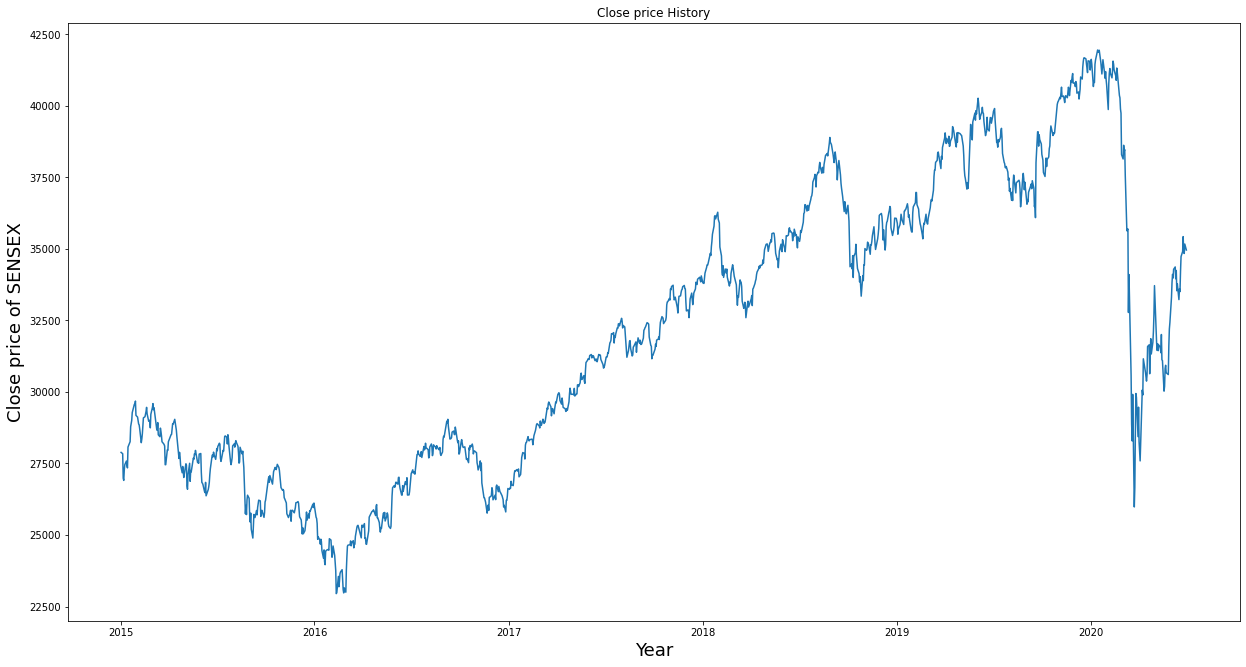

In [14]:
# Visualize the closing price index
plt.figure(figsize=(21,11))
plt.title('Close price History')
plt.plot(stock_df['Close'],)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Close price of SENSEX', fontsize=18)
plt.show()

In [15]:
result = pd.DataFrame(stock_df)
# Get the values of change in stock price in a single day
result['label'] = stock_df['Close'].values - stock_df['Open'].values
# result = pd.DataFrame(result)

In [16]:
# store the value in our stock_df datasets
stock_df['Label'] = result['label'].values
stock_df.head()

,Open,High,Low,Close,Adj Close,Volume,label,Label
Date,,,,,,,,
2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400.0,366.621094,366.621094
2015-01-05,27978.429688,28064.490234,27786.849609,27842.320313,27842.320313,9200.0,-136.109375,-136.109375
2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100.0,-706.769531,-706.769531
2015-01-07,26983.429688,27051.599609,26776.119141,26908.820313,26908.820313,12200.0,-74.609375,-74.609375
2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200.0,95.941407,95.941407


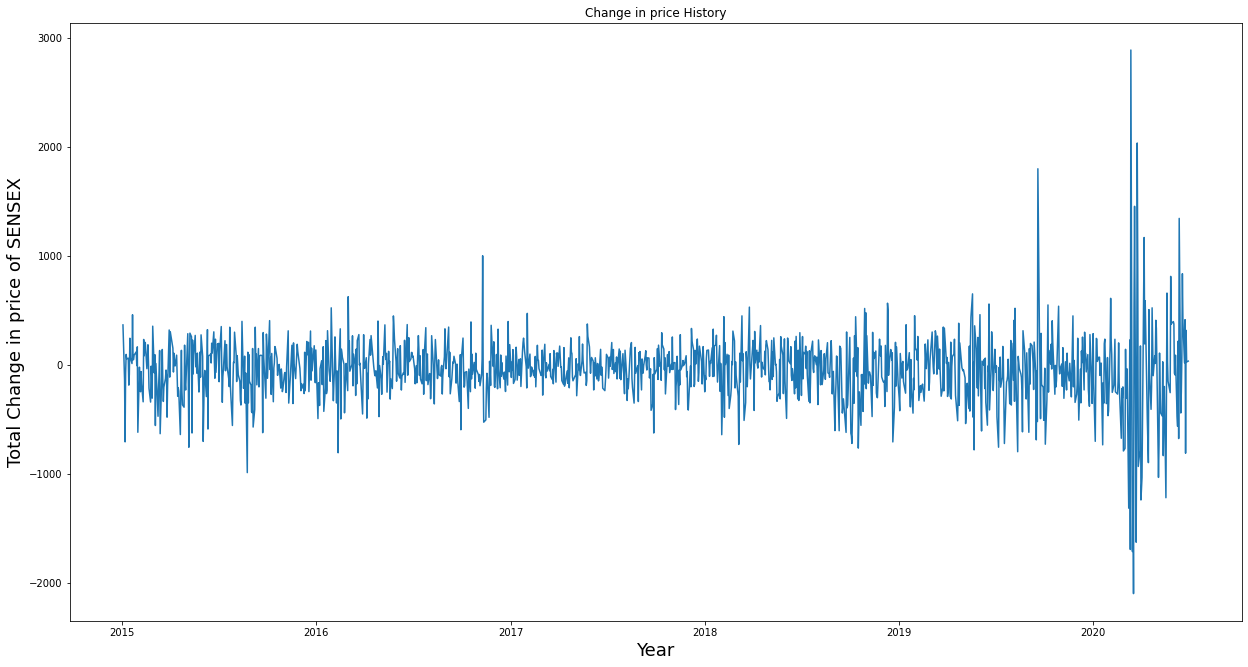

In [17]:
# Visualize the total up and down in price index
plt.figure(figsize=(21,11))
plt.title('Change in price History')
plt.plot(stock_df['Label'])
plt.xlabel('Year', fontsize=18)
plt.ylabel('Total Change in price of SENSEX', fontsize=18)
plt.show()

In [18]:
stock_df.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
label        False
Label        False
dtype: bool

In [19]:
import math
# Create a dataframe with only the 'Close column'
data = stock_df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model (80% of the length of dataset)
training_data_len = math.ceil(len(dataset) * .8) # ceil Round a number upward to its nearest integer

training_data_len

1076

In [20]:
from sklearn.preprocessing import MinMaxScaler
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaler_data = scaler.fit_transform(dataset)

scaler_data.shape

(1345, 1)

In [21]:
# Create the training dataset
# Create the scaled training dataset
train_data = scaler_data[0:training_data_len, :]

# split the data into x_train, y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0]) # x_train contain 60 values from 0 to 60 index
    y_train.append(train_data[i, 0]) # contain 60th value
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.25978225, 0.2573834 , 0.21239269, 0.20825389, 0.22751048,
       0.23717691, 0.24385498, 0.23545854, 0.23130555, 0.26965817,
       0.27209701, 0.27947139, 0.30697866, 0.31246209, 0.31862815,
       0.33298651, 0.34836477, 0.34774062, 0.35419245, 0.32793985,
       0.32474632, 0.31831875, 0.31215947, 0.31046803, 0.30346514,
       0.27764941, 0.28439799, 0.29378452, 0.30805387, 0.32330744,
       0.32546267, 0.33516642, 0.3426403 , 0.33049032, 0.31700137,
       0.31855661, 0.31873187, 0.30497772, 0.32989608, 0.34247563,
       0.34955901, 0.33834895, 0.34193926, 0.31014218, 0.30304195,
       0.30037368, 0.31464888, 0.29217038, 0.28871843, 0.30443724,
       0.29842372, 0.29040041, 0.27942246, 0.27578785, 0.27419324,
       0.27156753, 0.23713477, 0.23719058, 0.26441148, 0.26344472])]
[0.27937301978996576]

[array([0.25978225, 0.2573834 , 0.21239269, 0.20825389, 0.22751048,
       0.23717691, 0.24385498, 0.23545854, 0.23130555, 0.26965817,
       0.27209701, 0.27947139, 0.30

In [22]:
# a = []
# a.append(train_data[:60,0])
# a

In [23]:
# Convert the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [24]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # 3D shape for data set
x_train.shape

(1016, 60, 1)

In [25]:
# !pip install tensorflow

In [26]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [27]:
# !pip install --upgrade keras

In [28]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [29]:

# Built the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(Dense(25))
model.add(Dense(1))

In [30]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

RuntimeError: ignored

In [ ]:
# Create the testing data set 
# create a new array containing scaled values from 1541 to 2003
test_data = scaler_data[training_data_len - 60:, :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


In [ ]:
# Convert the data to numpy array
x_test = np.array(x_test)
x_test.shape

Different **model**

In [31]:
df=stock_df.reset_index()['Close']
df.head()

0    27887.900391
1    27842.320313
2    26987.460938
3    26908.820313
4    27274.710938
Name: Close, dtype: float64

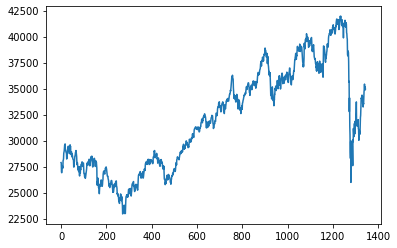

In [32]:
plt.plot(df)

In [33]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [34]:
##splitting dataset into train and test split
training_size=int(len(df)*0.65)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [35]:
training_size,test_size

(874, 471)

In [36]:
# train_data

In [37]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
  
	return np.array(dataX), np.array(dataY)

In [38]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [39]:
print(X_train.shape), print(y_train.shape)

(773, 100)
(773,)


(None, None)

In [40]:
print(X_test.shape), print(ytest.shape)


(370, 100)
(370,)


(None, None)

In [41]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [42]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [44]:
# model.summary()

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
13/13 [==============================] - 3s 243ms/step - loss: 0.0253 - val_loss: 0.0762
Epoch 2/10
13/13 [==============================] - 2s 177ms/step - loss: 0.0059 - val_loss: 0.0191
Epoch 3/10
13/13 [==============================] - 2s 191ms/step - loss: 0.0024 - val_loss: 0.0097
Epoch 4/10
13/13 [==============================] - 2s 179ms/step - loss: 0.0014 - val_loss: 0.0097
Epoch 5/10
13/13 [==============================] - 2s 176ms/step - loss: 0.0012 - val_loss: 0.0089
Epoch 6/10
13/13 [==============================] - 2s 188ms/step - loss: 0.0012 - val_loss: 0.0090
Epoch 7/10
13/13 [==============================] - 2s 177ms/step - loss: 0.0012 - val_loss: 0.0085
Epoch 8/10
13/13 [==============================] - 2s 178ms/step - loss: 0.0012 - val_loss: 0.0084
Epoch 9/10
13/13 [==============================] - 2s 178ms/step - loss: 0.0011 - val_loss: 0.0081
Epoch 10/10
13/13 [==============================] - 2s 173ms/step - loss: 0.0011 - val_loss: 0.0083

In [ ]:
X_train[0][0][10]

IndexError: ignored

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
## Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
train_predict[10]
# train = pd.DataFrame(train_predict)
# X_train[10]

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

In [ ]:
x_input=test_data[371:].reshape(1,-1) # We are taking last 100 days record
x_input.shape

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [ ]:
temp_input[10]

In [ ]:
# demonstrate prediction for next 100 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
print(len(lst_output))

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df)

In [ ]:
scaler.inverse_transform(df[1158:]).shape
b = scaler.inverse_transform(df[1158:])
b= b.ravel()
b.shape

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df[1245:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df4=scaler.inverse_transform(df3).tolist()
plt.plot(df4)